plot max temperature evolution AND beam profile AND SEM+Thermionic emission 

2024.03.27, mariusz.sapinski@psi.ch




In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np

#matplotlib notebook


In [2]:
#sfile="PSI_RRL123MeV.txt"
sfile="PSI_RRL590MeV.txt"
#sfile="Last.txt"


In [3]:
# read simulation configuration file name
with open(sfile) as f:
    cfname=f.readlines()[1]
confname=cfname[26:]    
print(confname)    

PSI_RRL590MeV.txt 



In [4]:
# for WIRESCANNER option output only
#dft = pd.read_csv("MaxTempVSTime.txt", skiprows=3, delim_whitespace=True, names=["em","time","pos","maxT"])
#dfc = pd.read_csv("IntensityVSTime.txt", skiprows=3, delim_whitespace=True, names=["time","pos","curr"])

# new format
#df = pd.read_csv("PSI_pChann_MBPTWS.txt", skiprows=4)
df = pd.read_csv(sfile, skiprows=9)

print(df.columns)


Index(['#   Time [us]', ' Position [mm]', ' Npart', ' MaxTemp [K]',
       ' SEMcurr [uA]', ' THcurr [uA] '],
      dtype='object')


In [5]:
# rename columns
df.rename({"#   Time [us]":"time"," Position [mm]":"pos"," Npart":"npart"," MaxTemp [K]":"maxt"," SEMcurr [uA]":"isem"," THcurr [uA] ":"ithc"}, axis='columns',inplace=True)

In [6]:
#print(dfc)
print(df)

                time     pos  npart      maxt          isem          ithc
0           6.734007 -5.0000    0.0  1030.000  8.462299e-24  1.034120e-16
1          13.468013 -4.9998    0.0  1030.000  8.495533e-24  1.034120e-16
2          20.202020 -4.9996    0.0  1030.000  8.528898e-24  1.034120e-16
3          26.936027 -4.9994    0.0  1030.000  8.562391e-24  1.034120e-16
4          33.670034 -4.9992    0.0  1030.000  8.596015e-24  1.034120e-16
...              ...     ...    ...       ...           ...           ...
49995  336673.400674  4.9990    0.0  1055.243  8.629770e-24  2.159442e-16
49996  336680.134680  4.9992    0.0  1055.242  8.596015e-24  2.159332e-16
49997  336686.868687  4.9994    0.0  1055.241  8.562391e-24  2.159222e-16
49998  336693.602694  4.9996    0.0  1055.239  8.528898e-24  2.159112e-16
49999  336700.336700  4.9998    0.0  1055.238  8.495533e-24  2.159002e-16

[50000 rows x 6 columns]


In [7]:
def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))


[ 5.47751384e+07 -2.08591521e-11  5.05089853e-01]


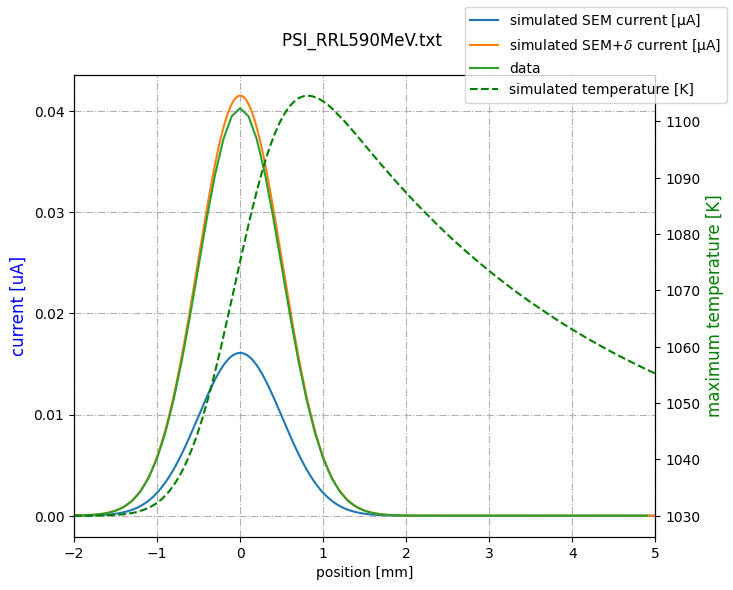

In [11]:
fig, ax = plt.subplots(1, figsize=(7.5,6))

# factor 2 is for 2 wires
hsimse, = ax.plot([x*1 for x in df["pos"]],[x for x in df["isem"]],label=r"simulated SEM current [$\rm \mu A$]")
hsimsec, = ax.plot([x*1 for x in df["pos"]],[2.58*x for x in df["isem"]],label=r"simulated SEM+$\delta$ current [$\rm \mu A$]")
#hsimit, = ax.plot([x*1 for x in df["pos"]],[2*x/1000 for x in df["ithc"]],label=r"thermionic current/10 [$\rm \mu A$]")
#hsimit, = ax.plot([x*1 for x in df["pos"]],[x for x in df["ithc"]],label=r"thermionic current [$\rm \mu A$]")
scale=1.1*df["isem"].max()/df["npart"].max()
#scale=0.9*df["ithc"].max()/df["npart"].max()


#hbeamp, = ax.plot([x*1 for x in df["pos"]],[scale*x for x in df["npart"]],"y--",label="beam profile [a.u.]")
ax.set_title(confname) 
#ax.set_ylim(0,0.6)
ax.grid(True, linestyle='-.')

# fit gauss to make sure it corresponds to input
popt, pcov = curve_fit(gauss_function, df['pos'], df["npart"], p0 = [df['npart'].max(), 0.0, 1.0])
print(popt)
#ax.plot(x, gauss_function(x, *popt), label='fit')

axtemp = ax.twinx()
#axtemp.set_ylim(0,2800)
hsimt, = axtemp.plot([x*1 for x in df["pos"]],df["maxt"],'g--',label="simulated temperature [K]")
axtemp.set_ylabel("maximum temperature [K]", fontsize=12, color='g')

ax.set_xlabel("position [mm]")
ax.set_ylabel("current [uA]", fontsize=12, color='b')

#axtime = ax.twiny()
tlimend=(df["time"].iloc[-1]-df["time"].iloc[0])/1e6 # ? 60 mm/s
#print(tlimend,df["time"].iloc[-1],df["time"].iloc[0])
#axtime.set_xlim(0,tlimend)
#axtime.set_xlabel(r"scan time [$s$]",loc="right",fontsize=12, color='red', labelpad=5)
#axtime.tick_params(axis='x', colors='red', labelsize=12)    #setting up X-axis tick color to red
#ax.tick_params(axis='both', which='major', labelsize=10)

ax.set_xlim(-2,5)


#ax.legend(handles=[hsimit,hsimse,hsimt], fontsize=12, frameon=False)
#ax.legend(handles=[hsimse,hsimt,hbeamp], fontsize=12, frameon=False)
#ax.grid()

# data fit
xf=np.arange(-4.0,5.0,0.1)
ax.plot(xf,gauss_function(xf,0.0403,0.0,0.505), label="data")
fig.legend()

plt.savefig('all.png')

In [10]:
dw=30e-6
vw=1

print("dt [us] = ",df["time"].iloc[2]-df["time"].iloc[1])
print("max wirestep [us] = ",dw/vw*1e6)

dt [us] =  6.734007000000002
max wirestep [us] =  30.0


In [11]:
# max SEM current [uA] 
print(max(df['isem']))

0.1492390416594511


In [120]:
# compare numbers of protons 
Np=2e13
frev=43478.26

print(Np*frev*dw/vw/1e13)

print(df["npart"].sum()/1e13)

print("missing: ",df["npart"].sum()/(Np*frev*dw/vw))

2.6086956
2.589422085372693
missing:  0.992611819245102
